In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [391]:
# Load the dataset
file_path = 'Sample - Superstore.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')


In [392]:
print(data.head)

<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       C

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [394]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [395]:
# Convert Order Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year from Order Date
data['Year'] = data['Order Date'].dt.year


In [396]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016


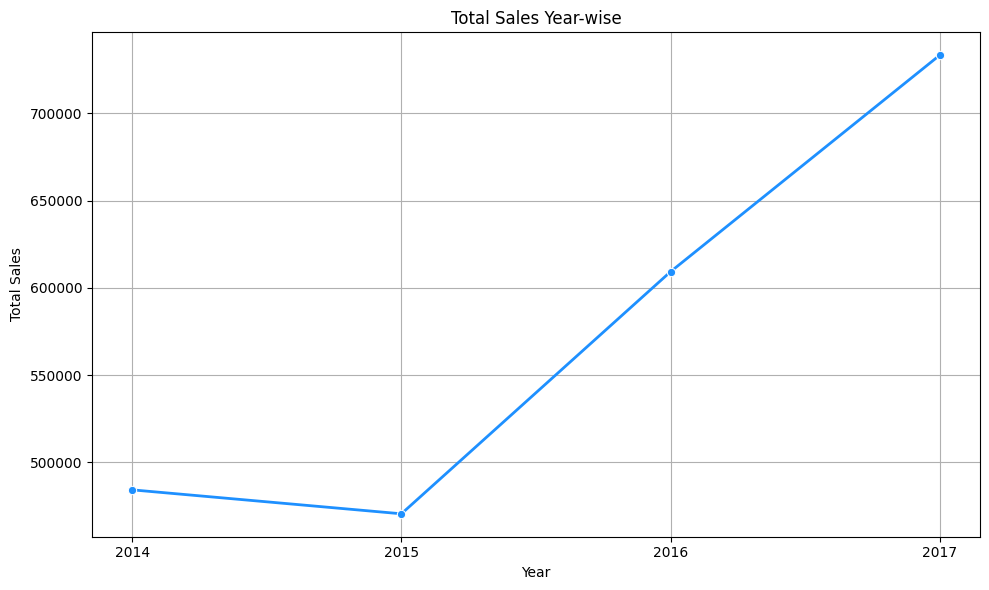

In [397]:
# Adjusting the x-axis to display years correctly
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', data=sales_yearly, marker='o', color='dodgerblue', linewidth=2)

# Setting the x-axis to show only full years without decimal points
plt.xticks(sales_yearly['Year'], labels=sales_yearly['Year'].astype(int))

plt.title('Total Sales Year-wise')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ORS\AppData\Local\Temp\ipykernel_9732\1709370557.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




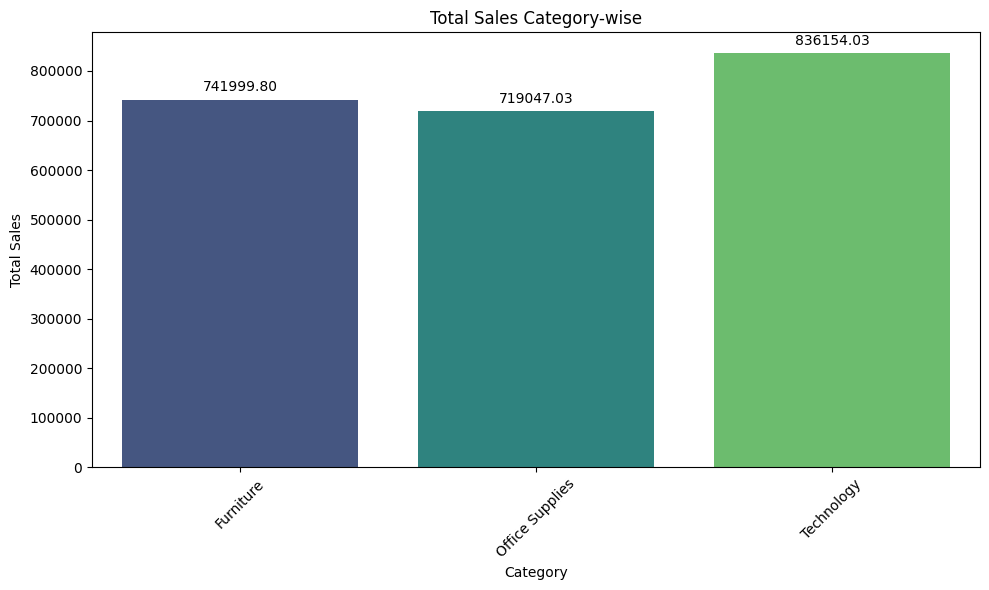

In [398]:
# Plotting with labels on bars
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='viridis')
plt.title('Total Sales Category-wise')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Adding labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()


C:\Users\ORS\AppData\Local\Temp\ipykernel_9732\2263203667.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




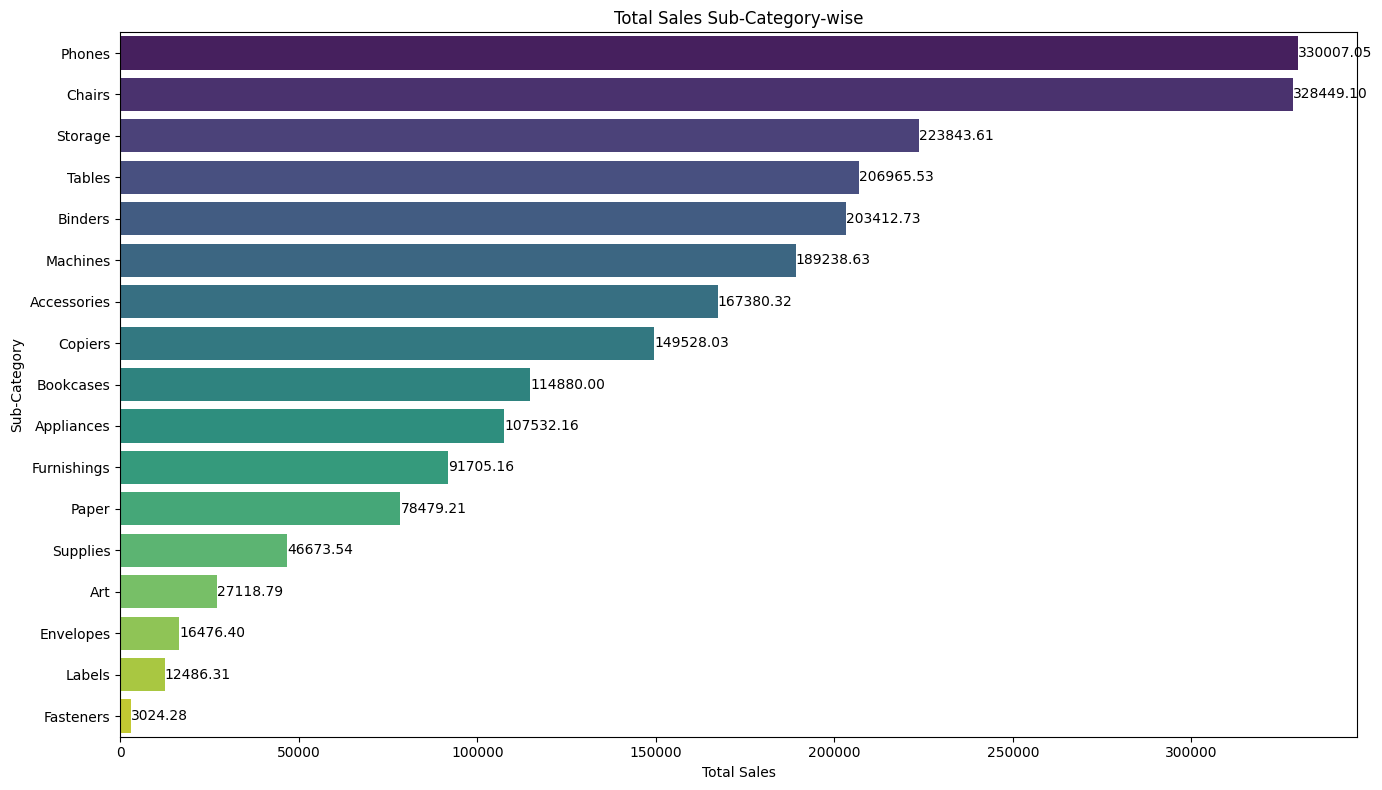

In [399]:
# Plotting with labels on bars for sub-category sales
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Sales', y='Sub-Category', data=sales_by_subcategory, palette='viridis')
plt.title('Total Sales Sub-Category-wise')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')

# Adding labels on the right of each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')

plt.tight_layout()
plt.show()


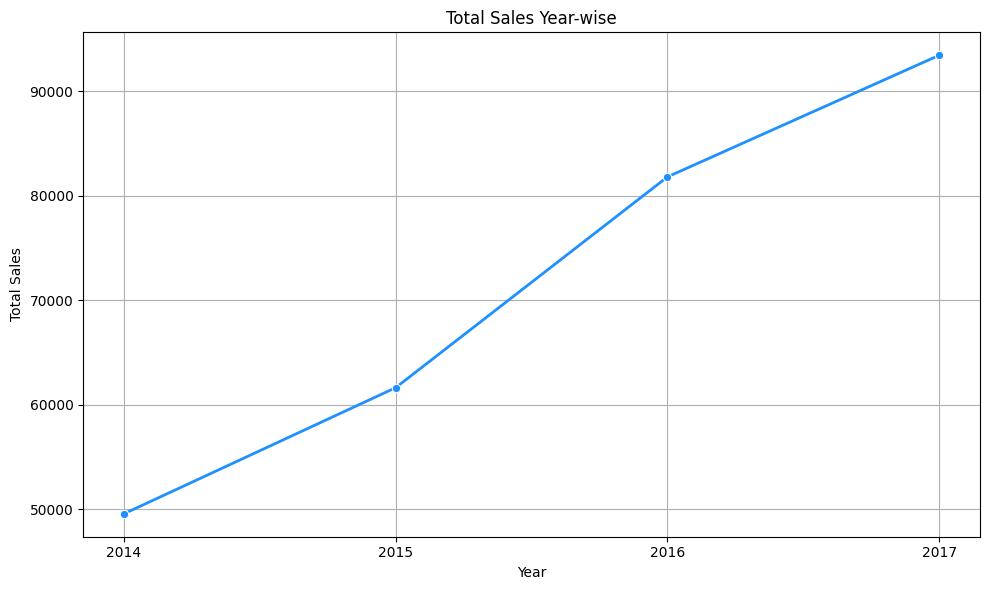

In [400]:
# Adjusting the x-axis to display years correctly
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Profit', data=profit_by_year, marker='o', color='dodgerblue', linewidth=2)

# Setting the x-axis to show only full years without decimal points
plt.xticks(profit_by_year['Year'], labels=profit_by_year['Year'].astype(int))

plt.title('Total Sales Year-wise')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [401]:
Profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()


Profit_by_subcategory = Profit_by_subcategory.sort_values(by='Profit', ascending=False)


fig = px.bar(Profit_by_subcategory,
             x='Sub-Category',
             y='Profit',
             title='Profit by Sub-Category',
             labels={'Profit': 'Total Profit', 'Sub-Category': 'Subcategory'},
             color='Profit', 
             color_continuous_scale='Viridis',  
             )

# Customizing layout
fig.update_layout(
    xaxis_title='Subcategory',
    yaxis_title='Total Profit',
    yaxis_tickformat='$,.2f',  
    plot_bgcolor='rgba(0,0,0,0)',  
    bargap=0.1,  
    font=dict(family='Arial', size=12),  
    title_font=dict(size=18, family='Arial', color='black'),  
    legend_title_font=dict(size=14, family='Arial', color='black'),  
)


fig.update_xaxes(tickangle=45)


fig.show()


In [402]:

sales_by_Region = data.groupby(['Category', 'Region'])['Profit'].sum().reset_index()


fig = px.bar(sales_by_Region,
             x='Region',
             y='Profit',
             color='Category',
             barmode='group',  
             color_discrete_sequence=px.colors.qualitative.Pastel,  
             labels={'Profit': 'Total Profit', 'Region': 'Region', 'Category': 'Category'},  
             title='Total Profit by Region and Category'  # Title
             )

# Customizing layout
fig.update_layout(
    xaxis_title='Region',  
    yaxis_title='Total Profit',  
    plot_bgcolor='rgba(0,0,0,0)',  
    font=dict(family='Arial', size=12),  
    title_font=dict(size=18, family='Arial', color='black'),  
    legend_title_font=dict(size=14, family='Arial', color='black'),
)    

# Showing the figure
fig.show()


C:\Users\ORS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [403]:
sales_by_Region = data.groupby(['Category', 'Region'])['Sales'].sum().reset_index()

fig = px.bar(sales_by_Region,
             x='Region',
             y='Sales',
             color='Category',
             barmode='group',  
             color_discrete_sequence=px.colors.qualitative.Pastel,  
             labels={'Sales': 'Total Sales', 'Region': 'Region', 'Category': 'Category'},  
             title='Total Sales by Region and Category'  # Title
             )


fig.update_layout(
    xaxis_title='Region',  
    yaxis_title='Total Sales',  
    plot_bgcolor='rgba(0,0,0,0)',  
    font=dict(family='Arial', size=12),  
    title_font=dict(size=18, family='Arial', color='black'),  
    legend_title_font=dict(size=14, family='Arial', color='black'),  
)

# Showing the figure
fig.show()


C:\Users\ORS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [404]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [405]:
binders_data = data[data['Sub-Category'] == 'Binders']
print("Number of samples in binders_data:", len(binders_data))


Number of samples in binders_data: 1523


In [406]:
features = ['Discount','Year']  # List of relevant features

In [407]:
X = binders_data[features]
y_sales = binders_data['Sales']
y_profit = binders_data['Profit']
X_train, X_test, y_sales_train, y_sales_test, y_profit_train, y_profit_test = train_test_split(X, y_sales, y_profit, test_size=0.2, random_state=42)

In [408]:
sales_model = LinearRegression()
profit_model = LinearRegression()

In [409]:
sales_model.fit(X_train, y_sales_train)
profit_model.fit(X_train, y_profit_train)

LinearRegression()

In [410]:
sales_predictions = sales_model.predict(X_test)
profit_predictions = profit_model.predict(X_test)

In [411]:
sales_mse = mean_squared_error(y_sales_test, sales_predictions)
profit_mse = mean_squared_error(y_profit_test, profit_predictions)

In [412]:
print("Sales Mean Squared Error:", sales_mse)
print("Profit Mean Squared Error:", profit_mse)

Sales Mean Squared Error: 613875.8042332323
Profit Mean Squared Error: 174982.80749040825


In [413]:
new_data = pd.DataFrame({'Discount': [0.1], 'Year': ['2017']})
new_sales_prediction = sales_model.predict(new_data)
new_profit_prediction = profit_model.predict(new_data)

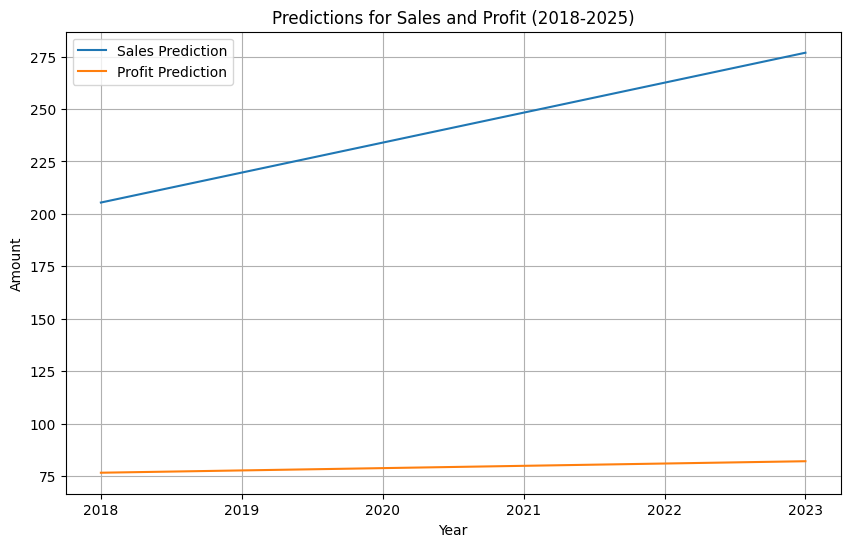

In [419]:
import pandas as pd
import matplotlib.pyplot as plt

years = range(2018, 2024)
data = pd.DataFrame({'Discount': 0.1,'Year': years})  

# Generate predictions for sales and profit
data['Sales Prediction'] = sales_model.predict(data[['Discount','Year']])
data['Profit Prediction'] = profit_model.predict(data[['Discount','Year']])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Sales Prediction'], label='Sales Prediction')
plt.plot(data['Year'], data['Profit Prediction'], label='Profit Prediction')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Predictions for Sales and Profit (2018-2025)')
plt.legend()
plt.grid(True)
plt.show()
